In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('datasets//dengue.csv')

In [3]:
df

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [4]:
df.isnull().sum()

Month            0
Year             0
Region           0
Dengue_Cases     0
Dengue_Deaths    0
dtype: int64

In [5]:
df.columns

Index(['Month', 'Year', 'Region', 'Dengue_Cases', 'Dengue_Deaths'], dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          1020 non-null   object
 1   Year           1020 non-null   int64 
 2   Region         1020 non-null   object
 3   Dengue_Cases   1020 non-null   int64 
 4   Dengue_Deaths  1020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.0+ KB


In [7]:
df['Month'] = df['Month'].astype('category')
df['Year'] = df['Year'].astype('category')
df['Region'] = df['Region'].astype('category')



In [8]:
df.dtypes

Month            category
Year             category
Region           category
Dengue_Cases        int64
Dengue_Deaths       int64
dtype: object

<h1># what year have many casualties?</h1>

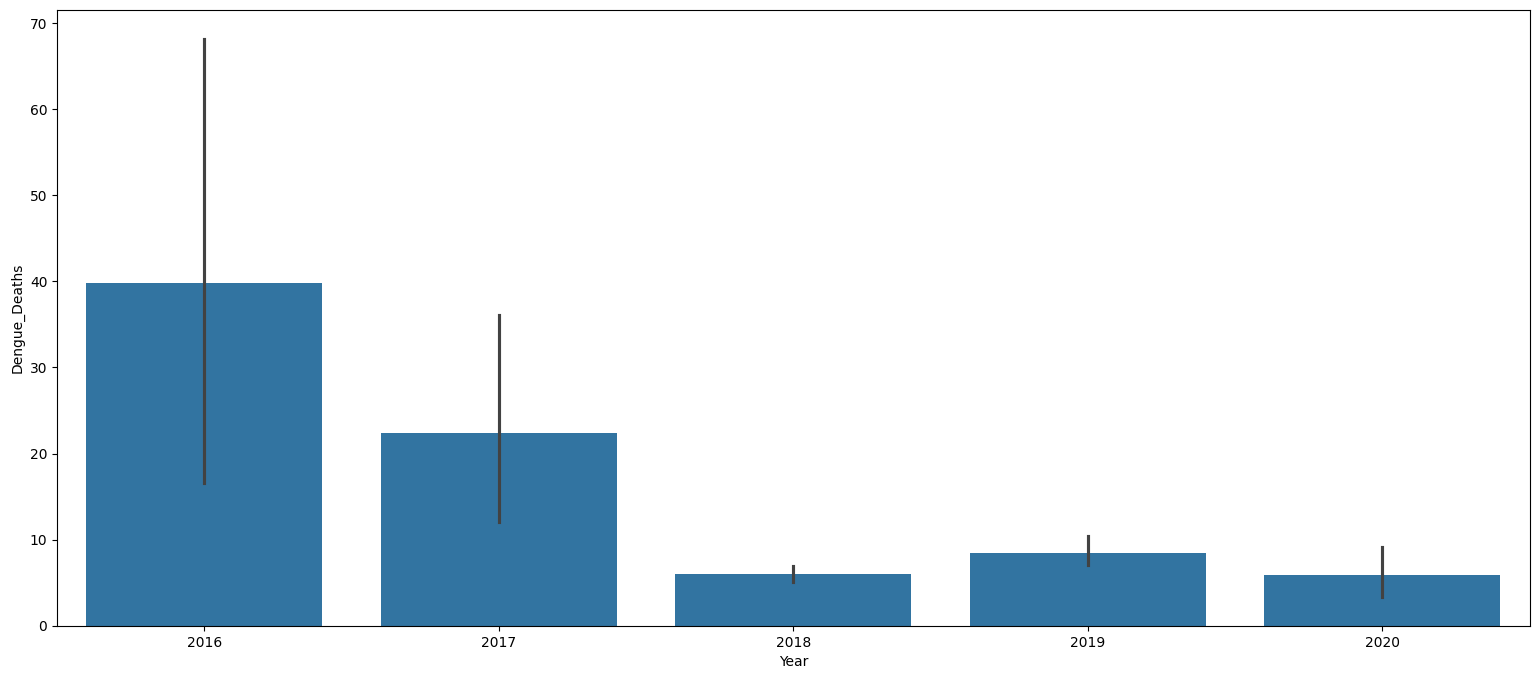

In [9]:
sns.barplot(data=df, x="Year", y="Dengue_Deaths")
plt.gcf().set_size_inches(19, 8) 
plt.show()

<h1>Insight #1 year 2016 have the most casualties</h1>

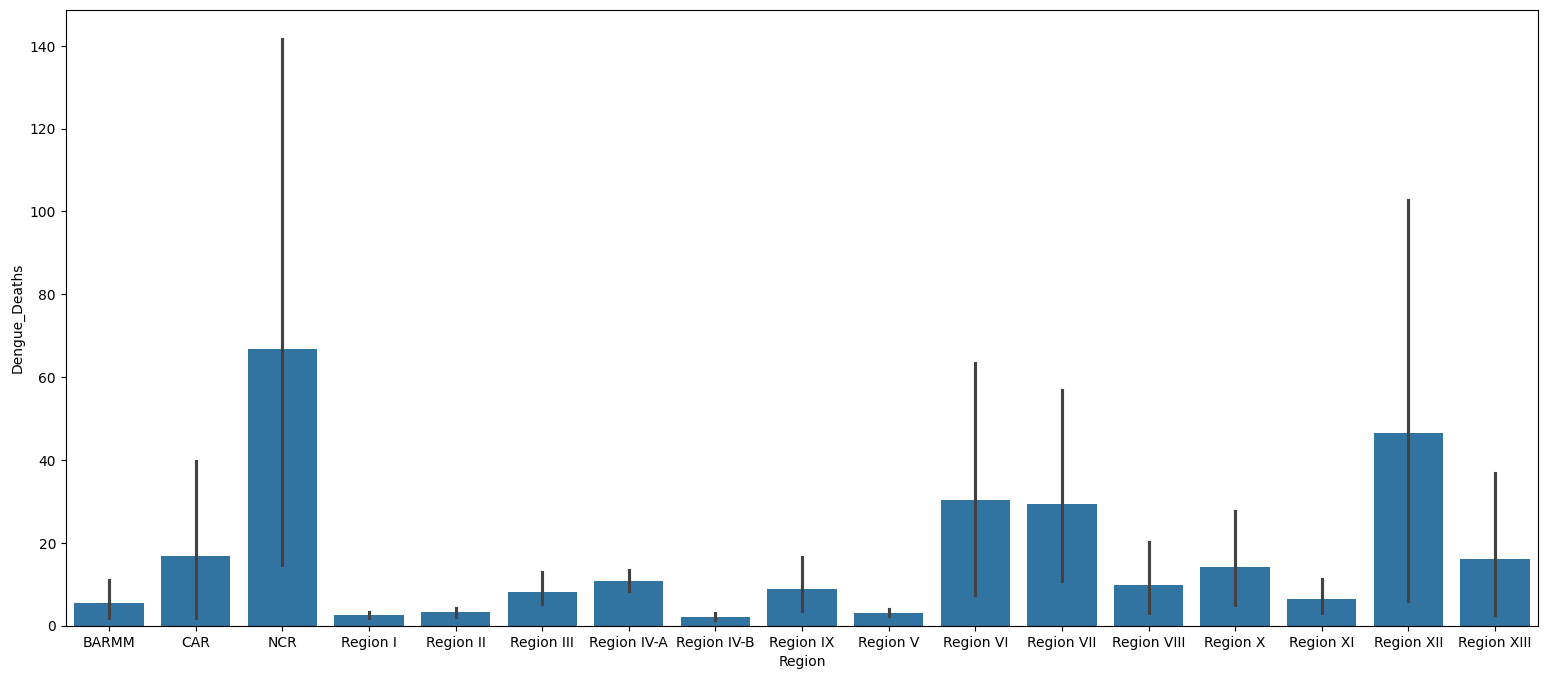

In [10]:
sns.barplot(data=df, x="Region", y="Dengue_Deaths")
plt.gcf().set_size_inches(19, 8) 
plt.show()

<h1>Insight #2 Region NCR have the  most casualties in dengue</h1>

C:\Users\RIZEN\AppData\Local\Temp\ipykernel_11212\3460226683.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_cases = df.groupby(['Month', 'Year'])["Dengue_Cases"].sum()


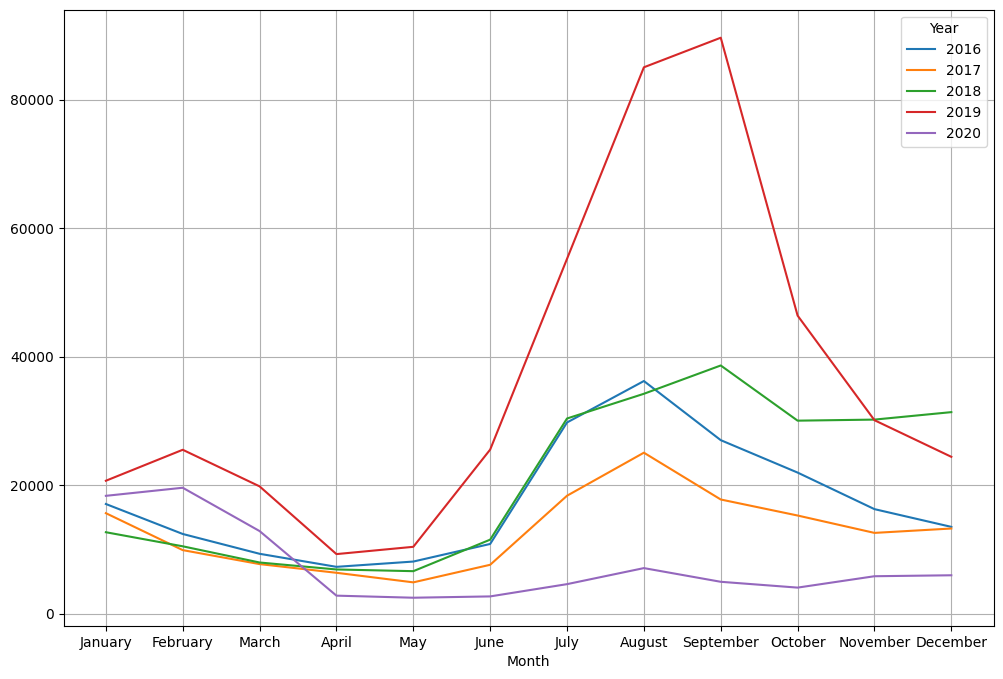

In [11]:

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)

monthly_cases = df.groupby(['Month', 'Year'])["Dengue_Cases"].sum()

monthly_cases.unstack().plot(kind='line')
plt.gcf().set_size_inches(12,8)
plt.grid(True)
plt.xticks(range(0,12), month_order)
plt.show()


<h1>Insight #3 we can see here that the number of dengue cases increas starting on june to december</h1>

<h1>Insight #4 The dengue cases is less when its hot sesson most lilkely in april and may</h1>

C:\Users\RIZEN\AppData\Local\Temp\ipykernel_11212\1719924317.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cases_per_year = df.groupby('Year')['Dengue_Cases'].sum().reset_index()


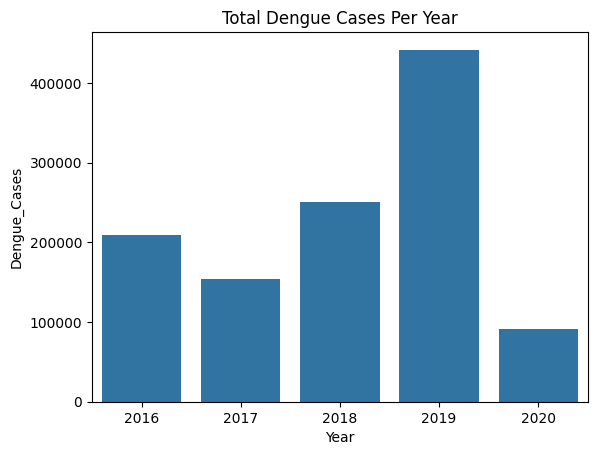

In [12]:
cases_per_year = df.groupby('Year')['Dengue_Cases'].sum().reset_index()

sns.barplot(x='Year', y='Dengue_Cases', data=cases_per_year)
plt.title('Total Dengue Cases Per Year')
plt.show()

<h1>Insight #5 In 2019 the total dengue cases is more than the other years</h1>

C:\Users\RIZEN\AppData\Local\Temp\ipykernel_11212\3447250909.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cases_per_region = df.groupby('Region')['Dengue_Cases'].sum().reset_index()


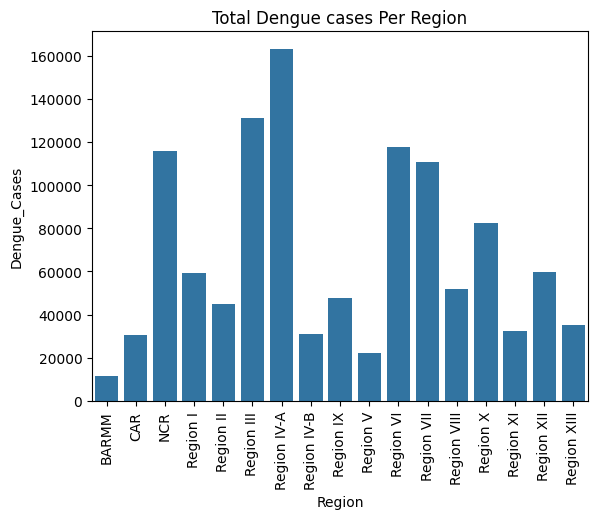

In [13]:
cases_per_region = df.groupby('Region')['Dengue_Cases'].sum().reset_index()

sns.barplot(x='Region', y='Dengue_Cases', data=cases_per_region)
plt.title('Total Dengue cases Per Region')
plt.xticks(rotation=90)
plt.show()


<h1>Insight #6 The most dengue cases came from region 4-a</h1>

<h1>Insight #7 the least cases is from BARMM</h1>

<h1>Insight #8 the region 3,region 4-a,region 6, region 7 and NCR have the most cases is it becuase they are more populated area?</h1>

C:\Users\RIZEN\AppData\Local\Temp\ipykernel_11212\3426317583.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  deaths_per_region = df.groupby('Region')['Dengue_Deaths'].sum().reset_index()


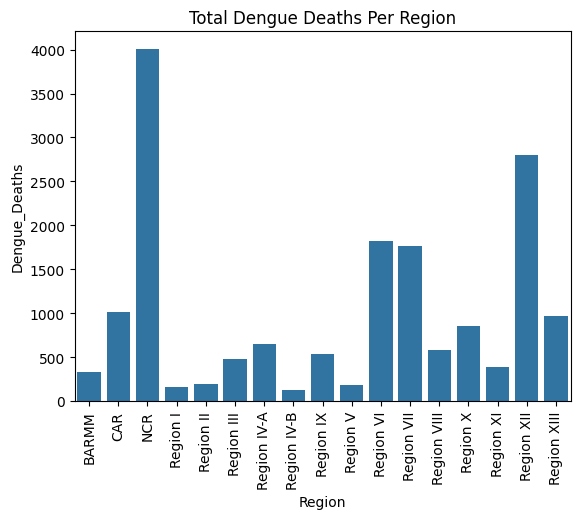

In [14]:
deaths_per_region = df.groupby('Region')['Dengue_Deaths'].sum().reset_index()

sns.barplot(x='Region', y='Dengue_Deaths', data=deaths_per_region)
plt.title('Total Dengue Deaths Per Region')
plt.xticks(rotation=90)
plt.show()


<h1>Insight #9 the NCR have the most casualty in dengue</h1>

<h1>Insight #10 the NCR and the region 9 have the most dengue deaths. is it becuase this areas have less facilities or they are far fram the hospital?</h1>

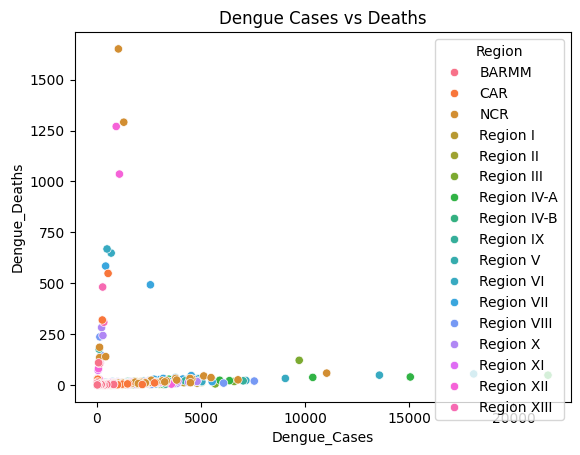

In [15]:
sns.scatterplot(data=df, x='Dengue_Cases', y='Dengue_Deaths', hue='Region')
plt.title('Dengue Cases vs Deaths')
plt.show()


In [16]:
corr = df['Dengue_Cases'].corr(df['Dengue_Deaths'])
print(corr)


0.03832213720419488


<h1>Insight #11 the correlation between dengue cases and deaths. there is a weak correlation</h1>

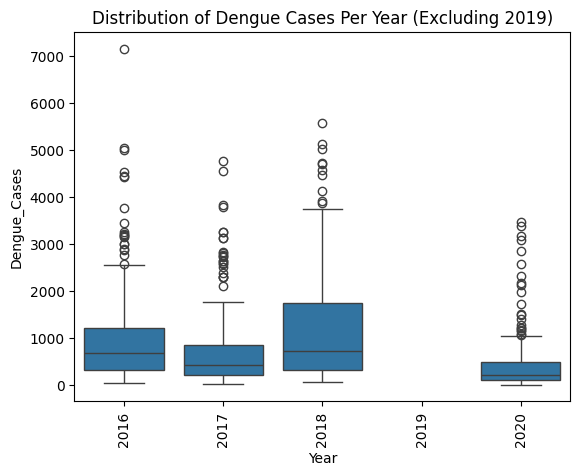

In [17]:
not_2019 = df[df['Year'] != 2019]

sns.boxplot(x='Year', y='Dengue_Cases', data=not_2019)
plt.title('Distribution of Dengue Cases Per Year (Excluding 2019)')
plt.xticks(rotation=90)
plt.show()



<h1>Insight #12 I remove the 2019. boxplot showing the dengue cases and we can see the highest median without 2019 is 2018</h1>

C:\Users\RIZEN\AppData\Local\Temp\ipykernel_11212\3228670351.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_deaths = df.groupby('Month')['Dengue_Deaths'].sum().reset_index()


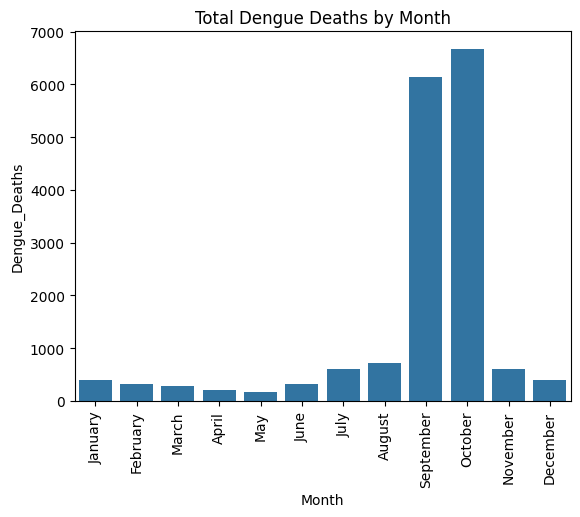

In [18]:
monthly_deaths = df.groupby('Month')['Dengue_Deaths'].sum().reset_index()
sns.barplot(data=monthly_deaths, x='Month', y='Dengue_Deaths')
plt.xticks(rotation=90)
plt.title('Total Dengue Deaths by Month')
plt.show()


<h1>Insight #13 August and September usually have the highest dengue deaths.</h1>

<h1>Insight #14 beside August and September the othe months have a least dengue deaths</h1>

C:\Users\RIZEN\AppData\Local\Temp\ipykernel_11212\2956300968.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  deaths_per_region = df.groupby('Region')['Dengue_Deaths'].sum().reset_index()


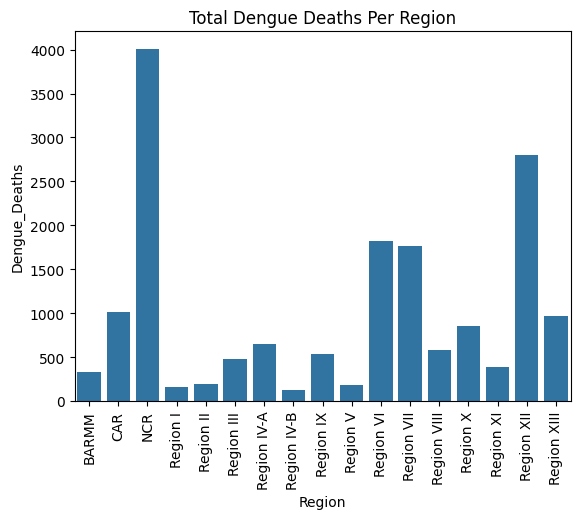

In [19]:
deaths_per_region = df.groupby('Region')['Dengue_Deaths'].sum().reset_index()

sns.barplot(x='Region', y='Dengue_Deaths', data=deaths_per_region)
plt.title('Total Dengue Deaths Per Region')
plt.xticks(rotation=90)
plt.show()

<h1>Insight #15 The lowest cases in from region 1 and region 4 -b</h1>

C:\Users\RIZEN\AppData\Local\Temp\ipykernel_11212\1234444082.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ratio = df.groupby('Region')[['Dengue_Cases', 'Dengue_Deaths']].sum()


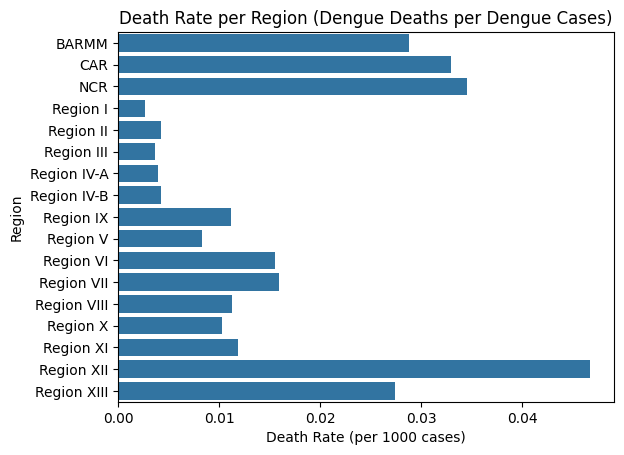

In [20]:

ratio = df.groupby('Region')[['Dengue_Cases', 'Dengue_Deaths']].sum()
ratio['Death_Rate'] = ratio['Dengue_Deaths'] / ratio['Dengue_Cases']

sorted_ratio = ratio.sort_values('Death_Rate')

sns.barplot(x=sorted_ratio['Death_Rate'], y=sorted_ratio.index)
plt.title('Death Rate per Region (Dengue Deaths per Dengue Cases)')
plt.xlabel('Death Rate (per 1000 cases)')
plt.ylabel('Region')
plt.show()



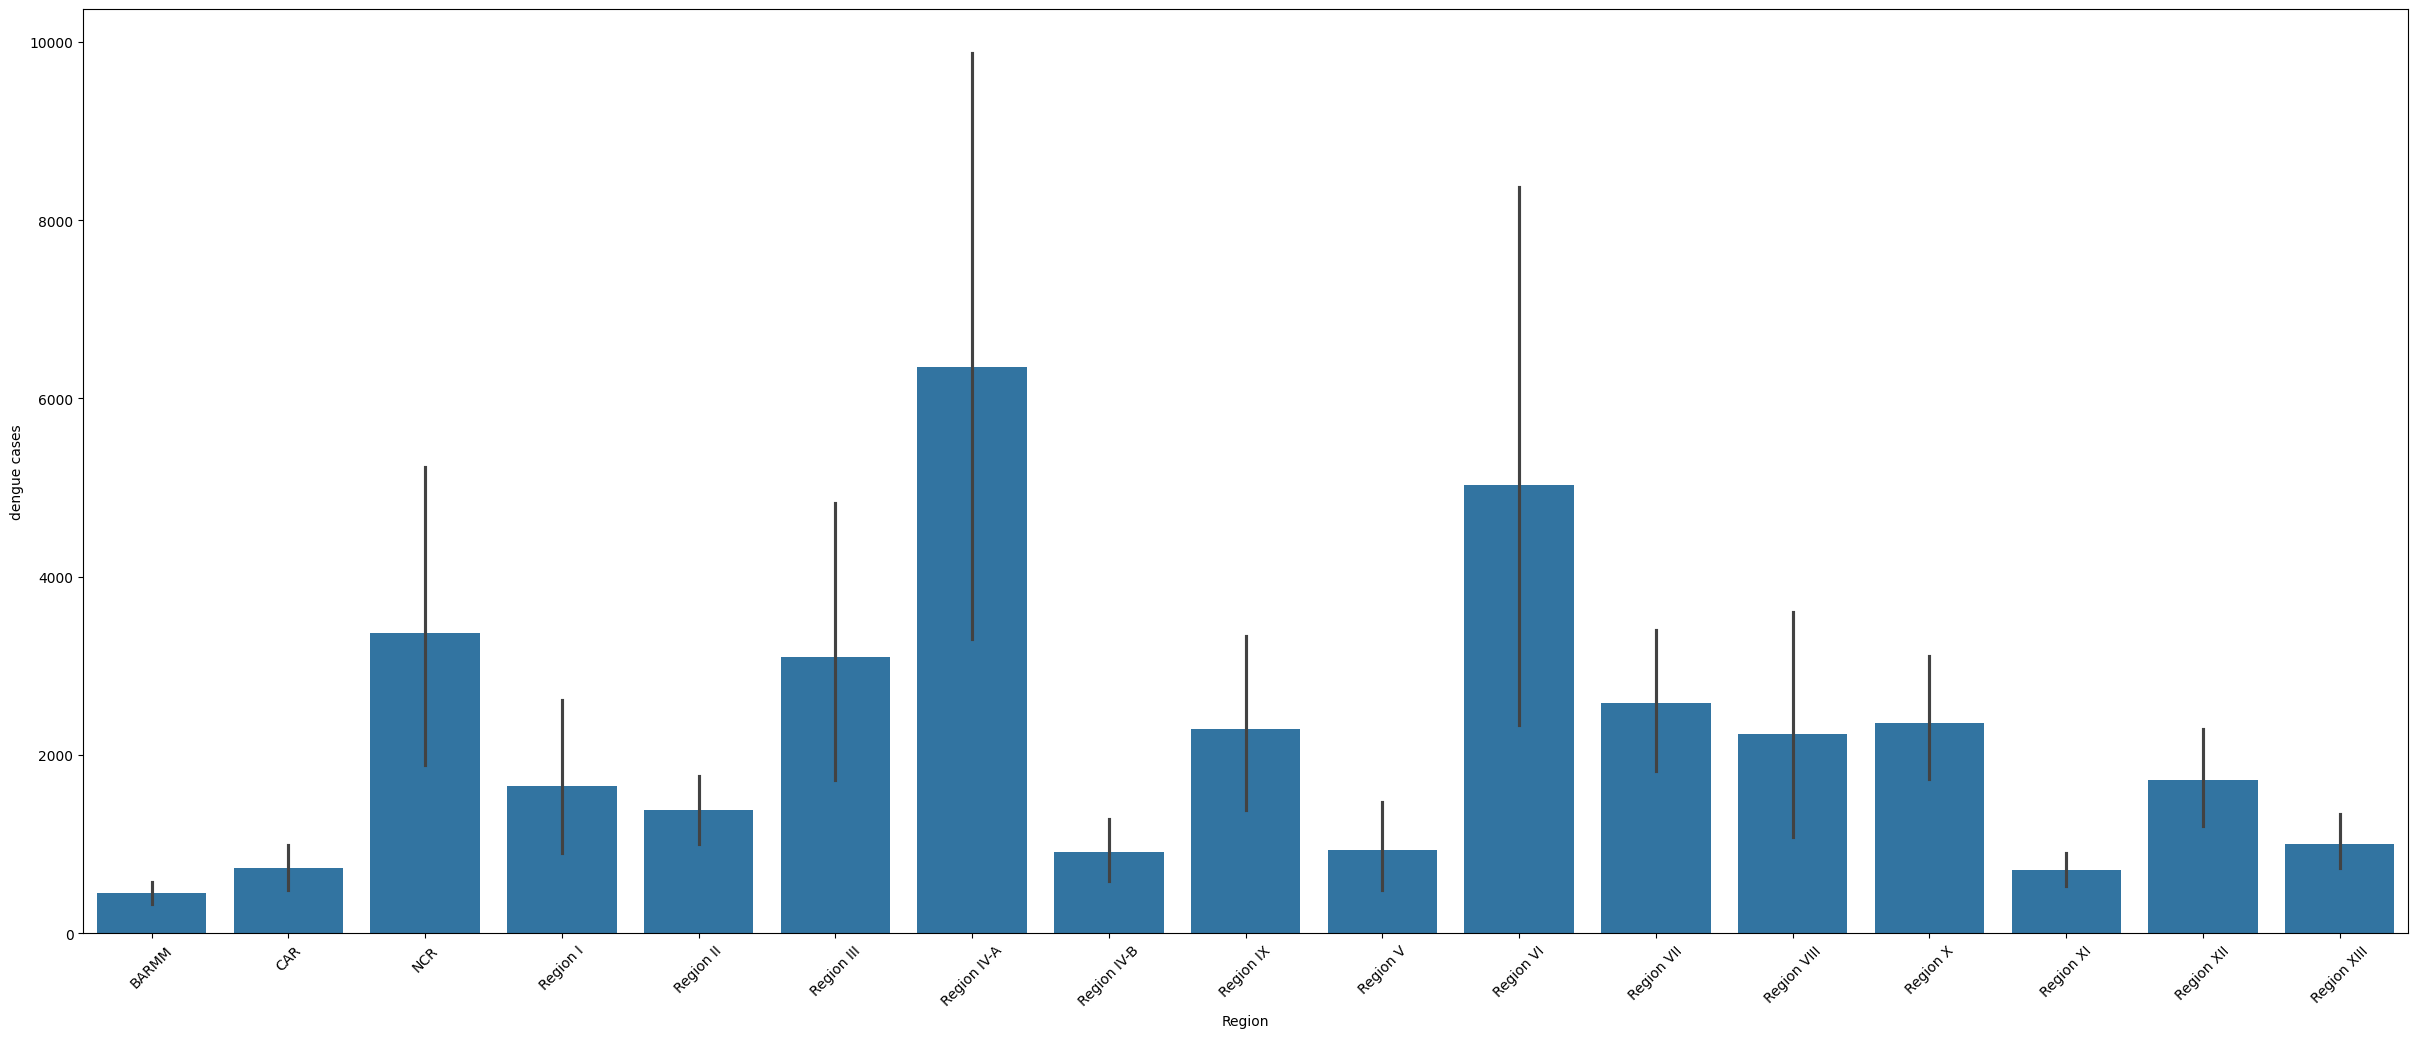

In [44]:
df_2019 = df[df['Year'] == 2019]
sns.barplot(data=df_2019, x="Region", y="Dengue_Cases")
plt.xlabel('Region')
plt.ylabel('dengue cases')
plt.xticks(rotation=45)
plt.gcf().set_size_inches(30, 12) 
plt.show()

<h1>Insight #16 In 2019 the dengue cases happen more in Region 4a and region 6. just the same as the all year this two region have the most cases.</h1>

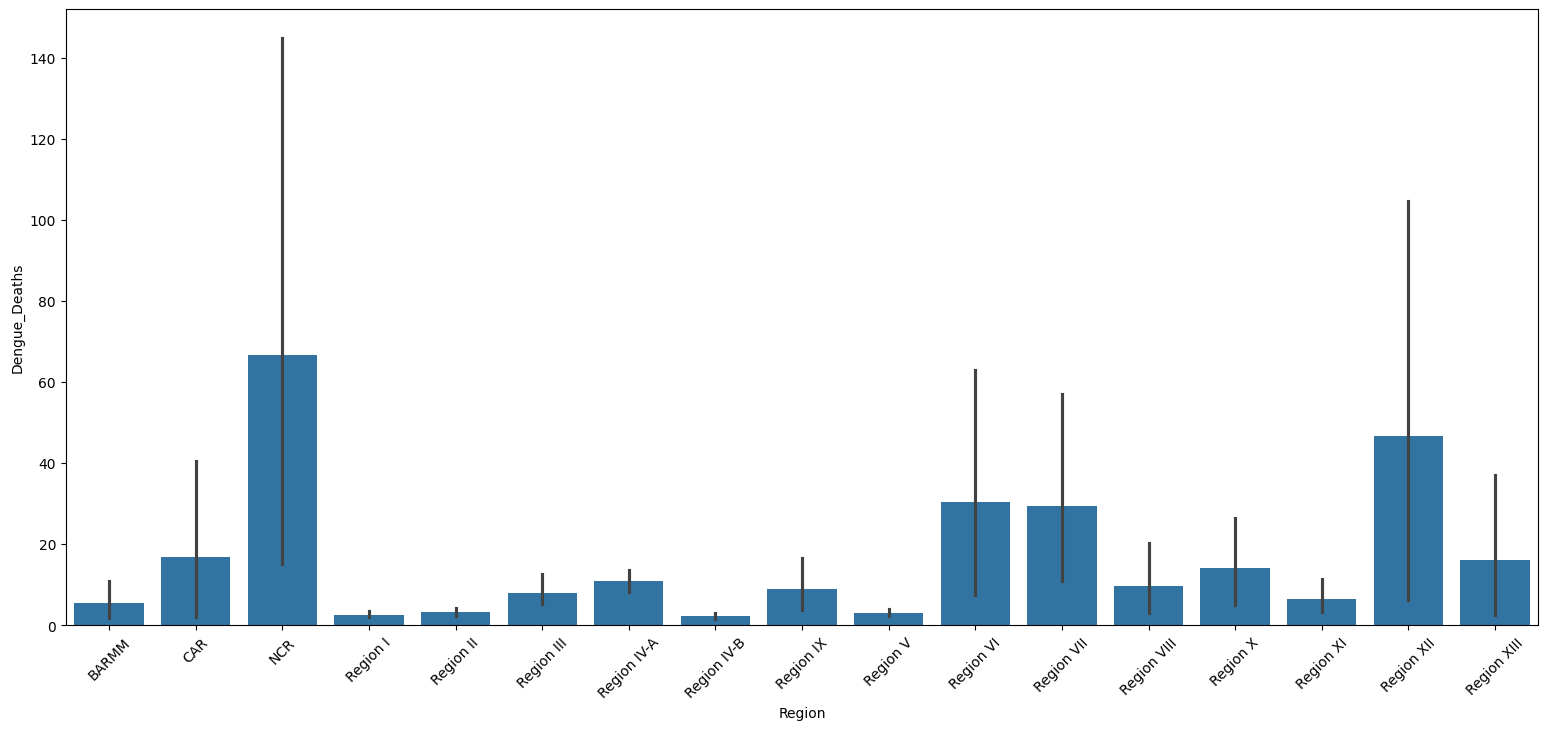

In [47]:
sns.barplot(data=df, x="Region", y="Dengue_Deaths")
plt.gcf().set_size_inches(19, 8) 
plt.xlabel('Region')
plt.ylabel('Dengue_Deaths')
plt.xticks(rotation=45)
plt.show()

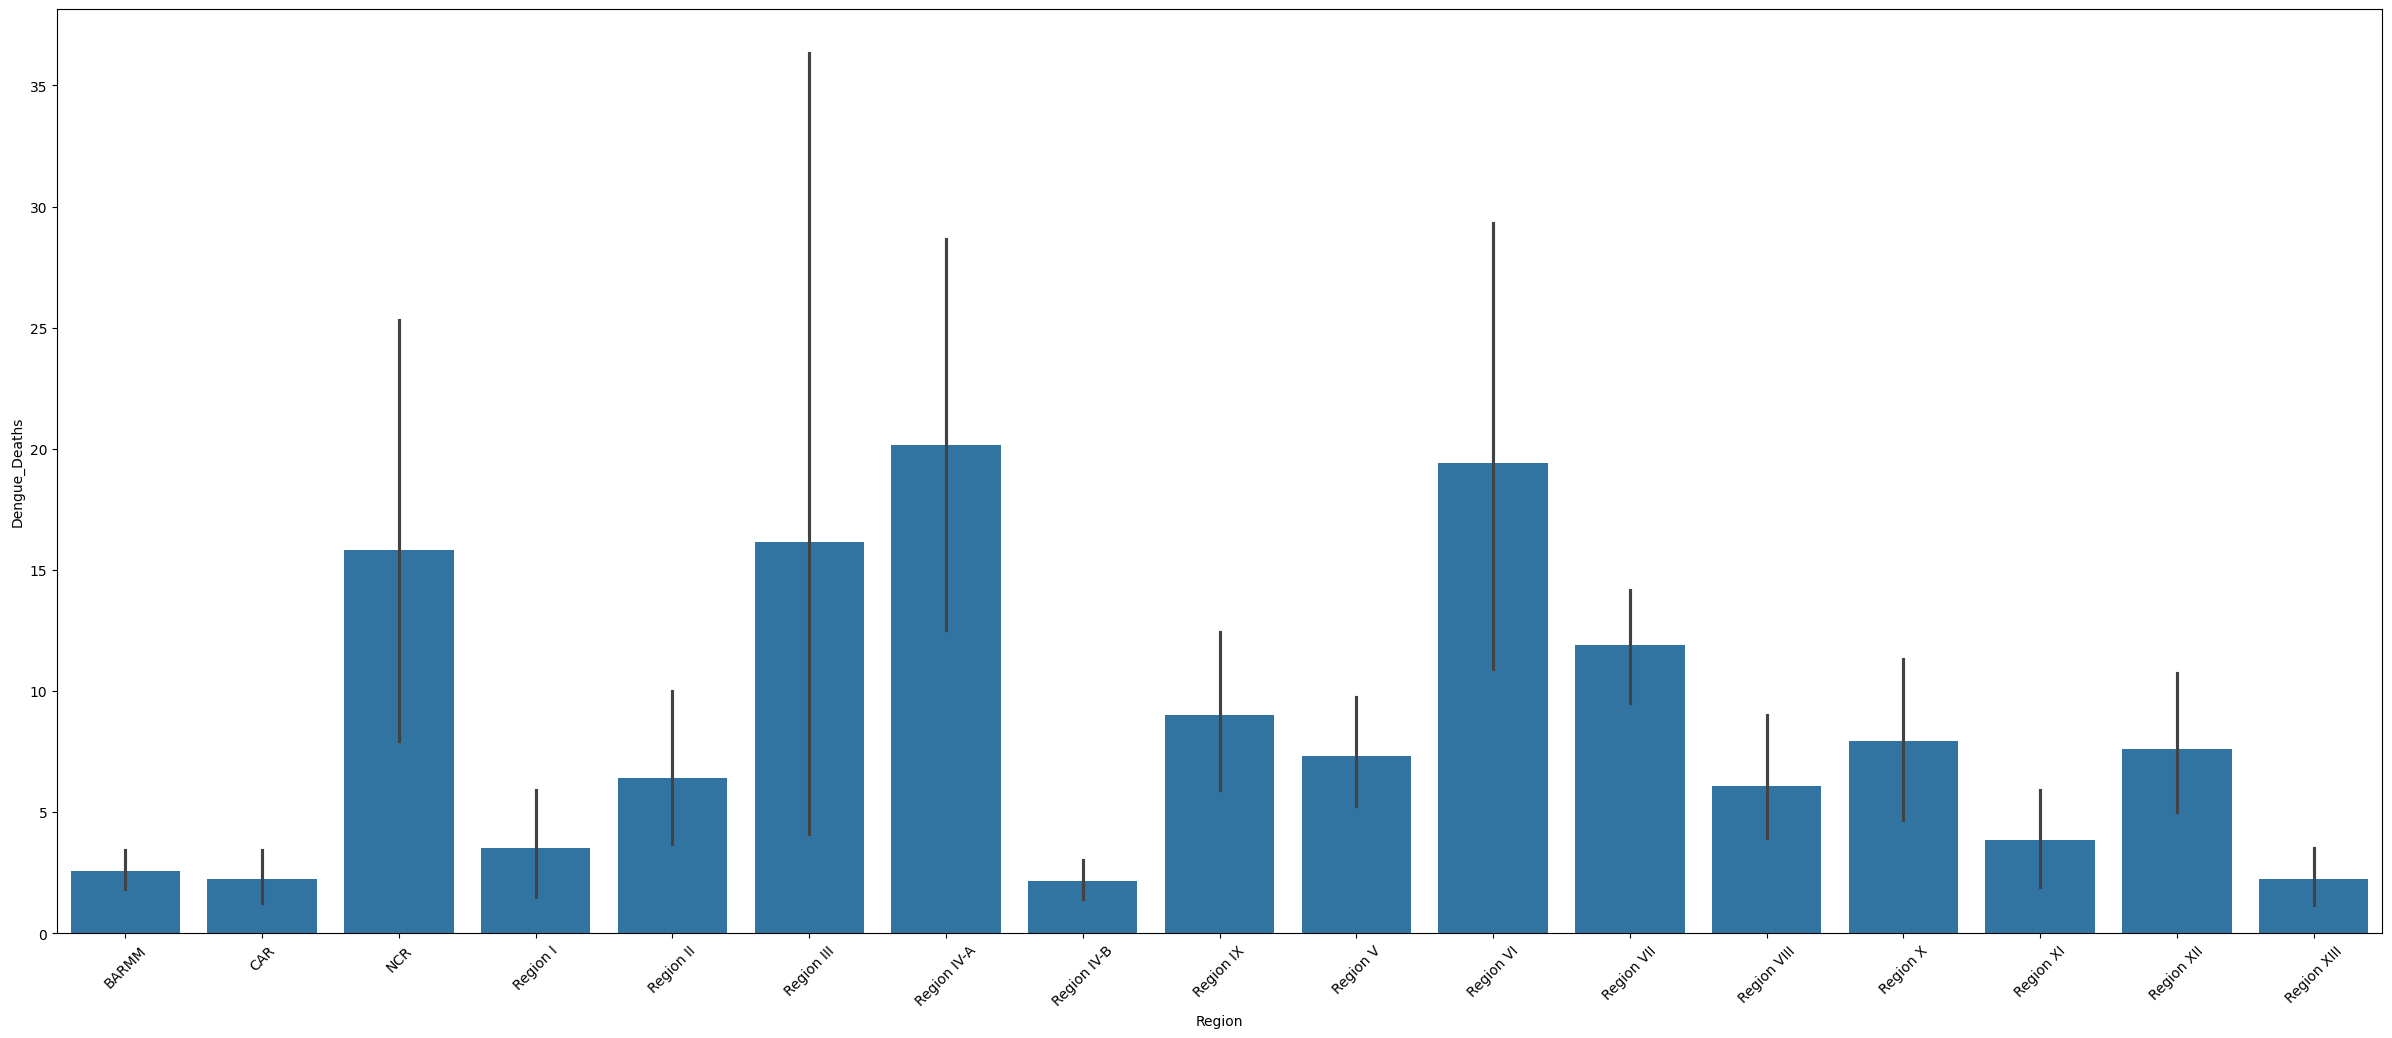

In [45]:
df_2019 = df[df['Year'] == 2019]
sns.barplot(data=df_2019, x="Region", y="Dengue_Deaths")
plt.xlabel('Region')
plt.ylabel('Dengue_Deaths')
plt.xticks(rotation=45)
plt.gcf().set_size_inches(30, 12) 
plt.show()

<h1>Insight #17 unlike in the all data in 2019 the most region who have more casualties are region4a and region6. is it because of covid 19?</h1>

In [49]:
corr_2019 = df_2019['Dengue_Cases'].corr(df_2019['Dengue_Deaths'])
print(corr_2019)

0.7766908407543017


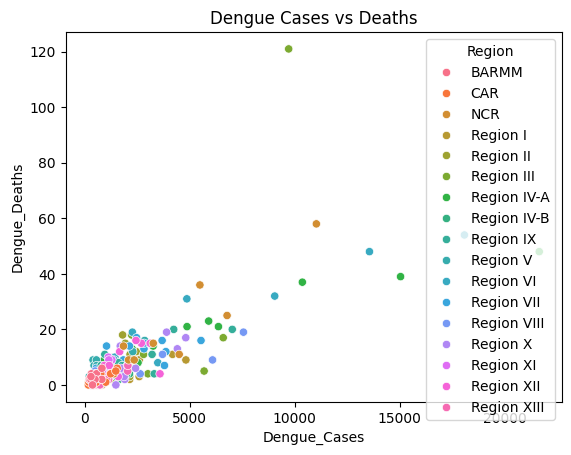

In [50]:
sns.scatterplot(data=df_2019, x='Dengue_Cases', y='Dengue_Deaths', hue='Region')
plt.title('Dengue Cases vs Deaths')
plt.show()


<h1>Insight #18 Also unlike in the all data that the dengue cases and death who have negative correlation but in 2019 there a positive correlation between dengue cases and dengue deaths</h1>

In [ ]:
corr_2019 = df_2019['Dengue_Cases'].corr(df_2019['Dengue_Deaths'])
print(corr_2019)

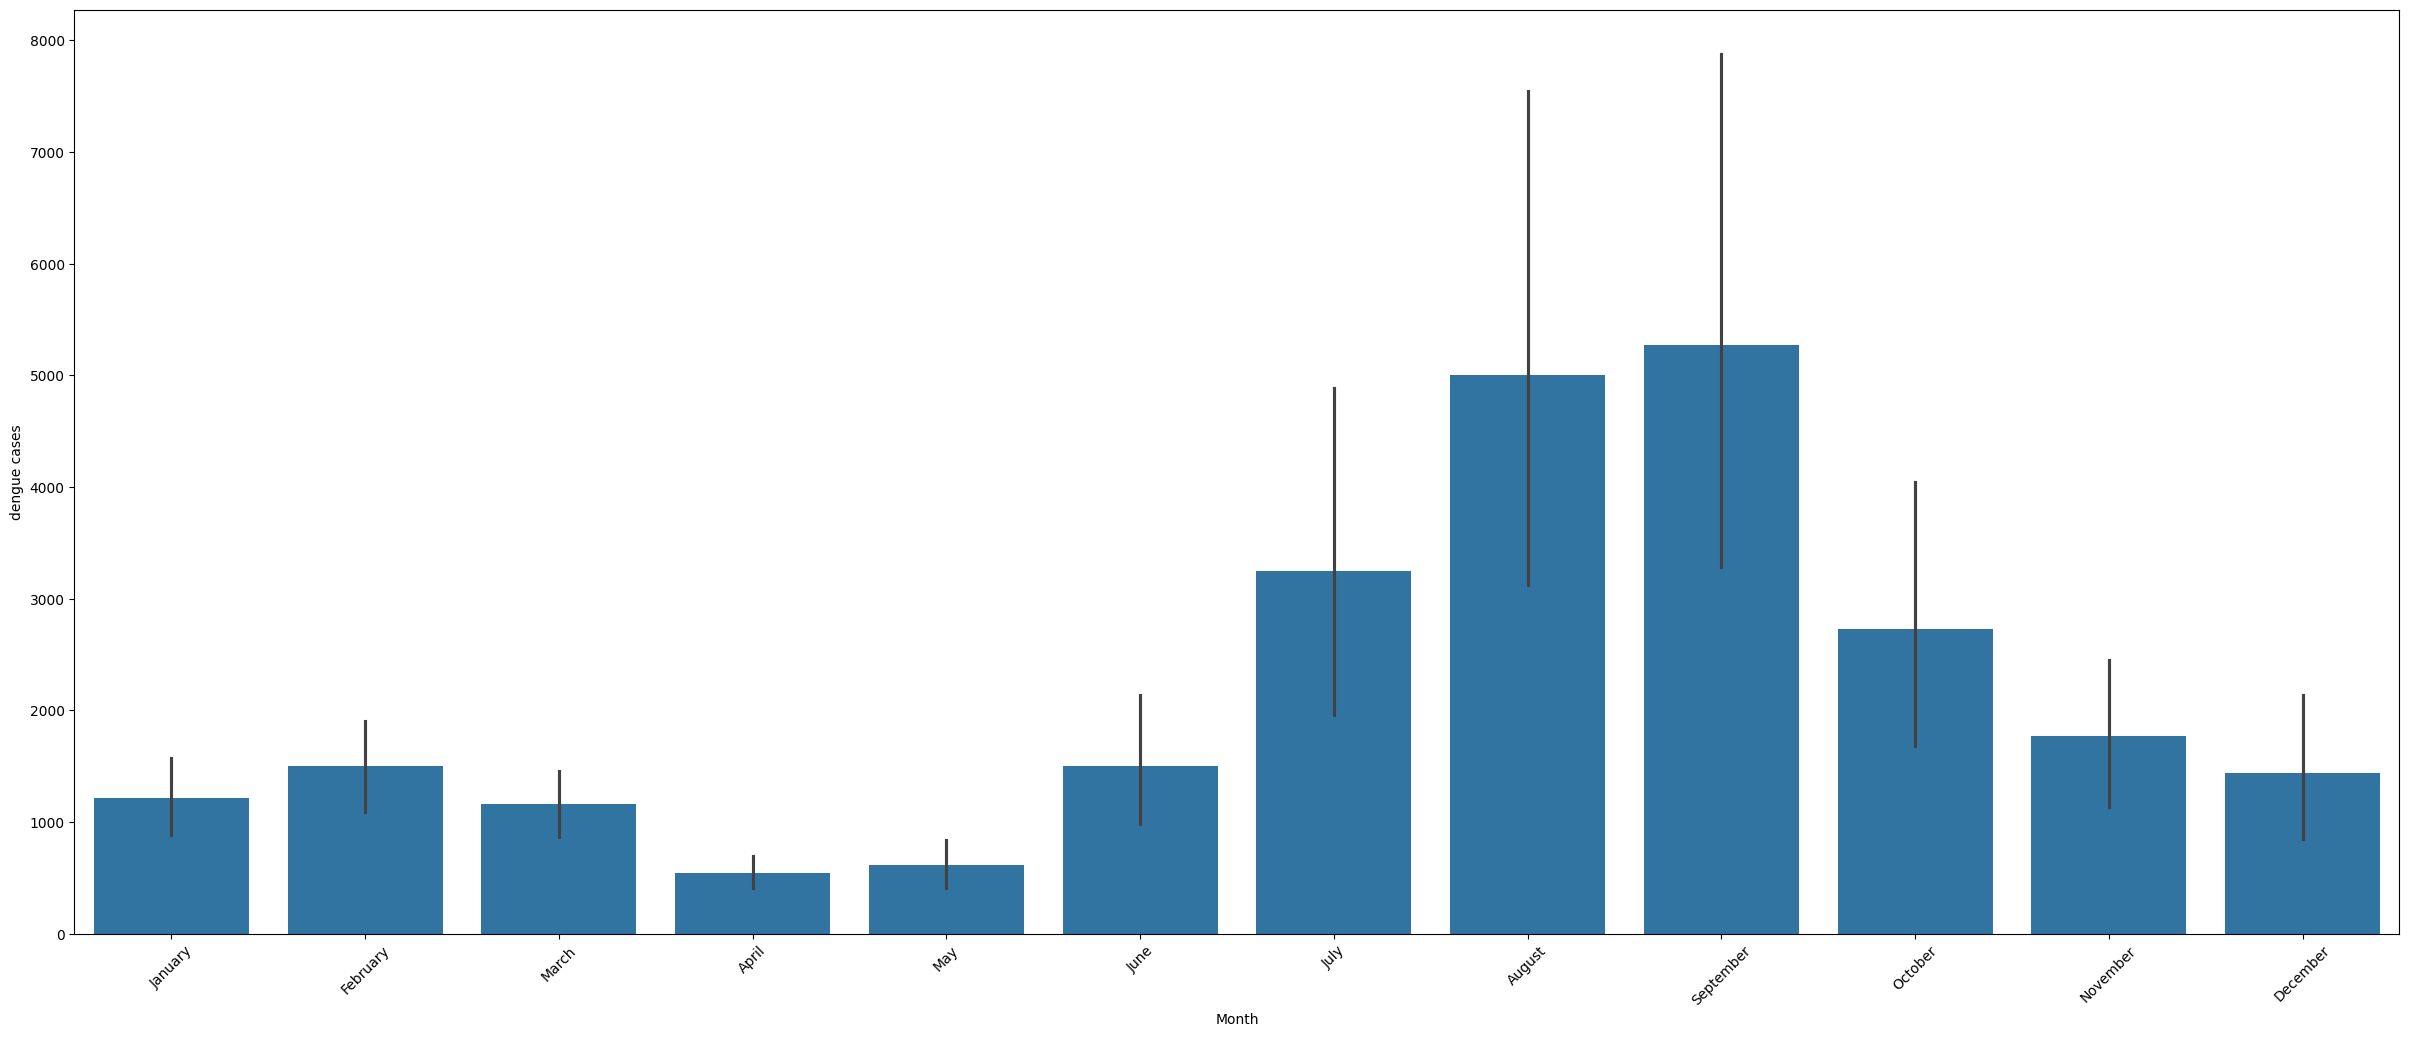

In [51]:
df_2019 = df[df['Year'] == 2019]
sns.barplot(data=df_2019, x="Month", y="Dengue_Cases")
plt.xlabel('Month')
plt.ylabel('dengue cases')
plt.xticks(rotation=45)
plt.gcf().set_size_inches(30, 12) 
plt.show()

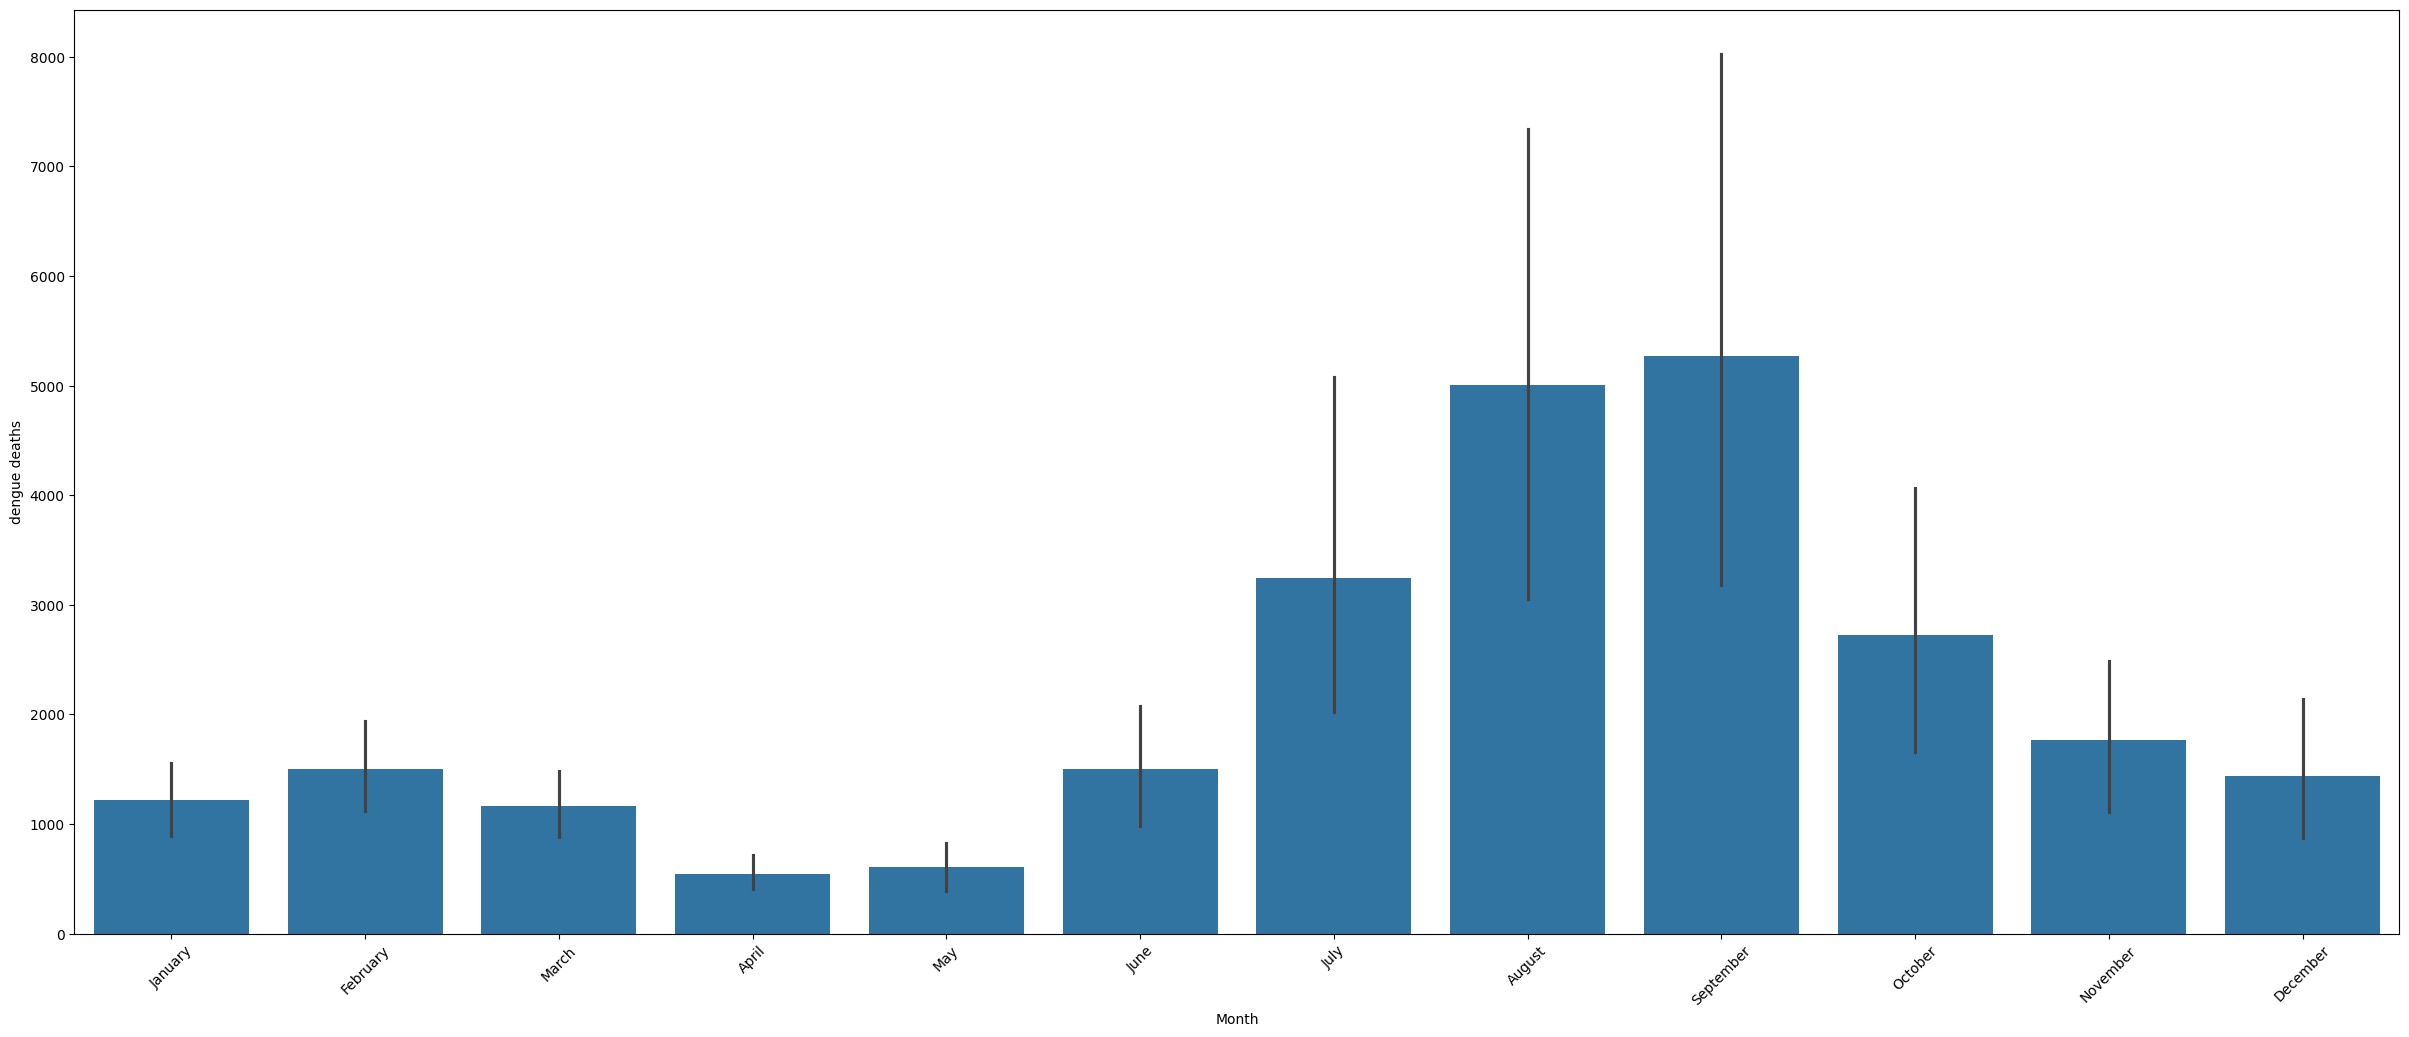

In [52]:
df_2019 = df[df['Year'] == 2019]
sns.barplot(data=df_2019, x="Month", y="Dengue_Cases")
plt.xlabel('Month')
plt.ylabel('dengue deaths')
plt.xticks(rotation=45)
plt.gcf().set_size_inches(30, 12) 
plt.show()

<h1>Insight #19 but here in 2019 most of the dengue cases and dengue death came from month of August and september. in all data the most peak are septerber and october</h1>

C:\Users\RIZEN\AppData\Local\Temp\ipykernel_11212\2634214819.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_deaths = df.groupby('Month')['Dengue_Deaths'].sum().reset_index()


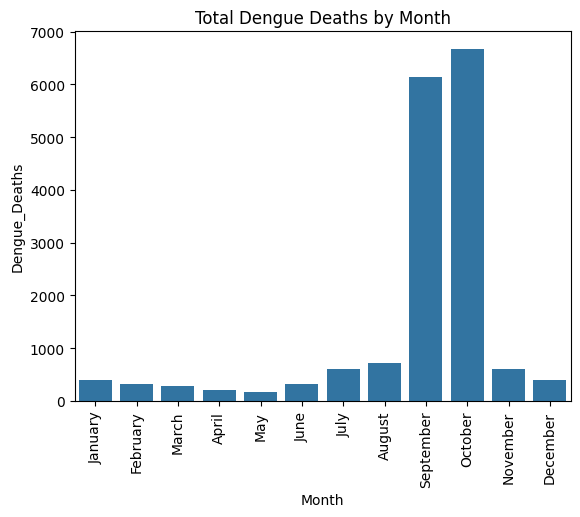

In [56]:
monthly_deaths = df.groupby('Month')['Dengue_Deaths'].sum().reset_index()
sns.barplot(data=monthly_deaths, x='Month', y='Dengue_Deaths')
plt.xticks(rotation=90)
plt.title('Total Dengue Deaths by Month')
plt.show()

<h1>this is the death from dengue cases all year<h1/>

C:\Users\RIZEN\AppData\Local\Temp\ipykernel_11212\694024848.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_cases = df.groupby('Month')['Dengue_Cases'].sum().reset_index()


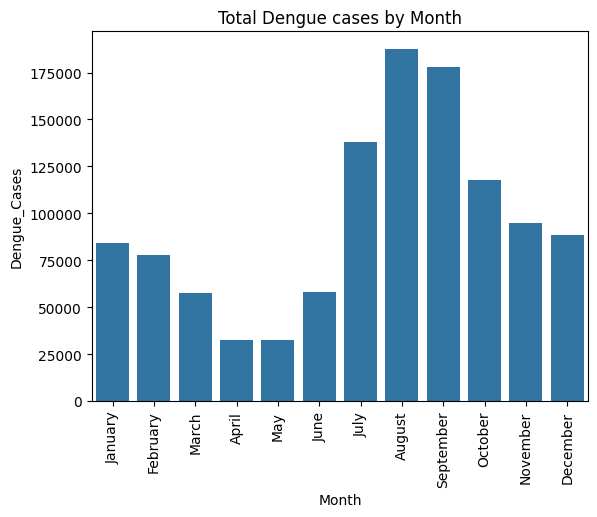

In [57]:
monthly_cases = df.groupby('Month')['Dengue_Cases'].sum().reset_index()
sns.barplot(data=monthly_cases, x='Month', y='Dengue_Cases')
plt.xticks(rotation=90)
plt.title('Total Dengue cases by Month')
plt.show()

<h1>Insight #20 we can see here this all year data that the most dengue cases happen in july, august, septermber and october. but most of the casualty happen more often in the month of septermber and october  only even if they are the highest the difference is quite noticable</h1>

In [39]:
df_2019

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
36,January,2019,Region I,596,2
37,February,2019,Region I,633,1
38,March,2019,Region I,399,0
39,April,2019,Region I,183,1
40,May,2019,Region I,197,1
...,...,...,...,...,...
1003,August,2019,BARMM,811,6
1004,September,2019,BARMM,807,2
1005,October,2019,BARMM,481,2
1006,November,2019,BARMM,362,0


In [21]:
df

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


C:\Users\RIZEN\AppData\Local\Temp\ipykernel_11212\3350154907.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_cases = df.groupby(['Month', 'Year'])["Dengue_Cases"].sum()


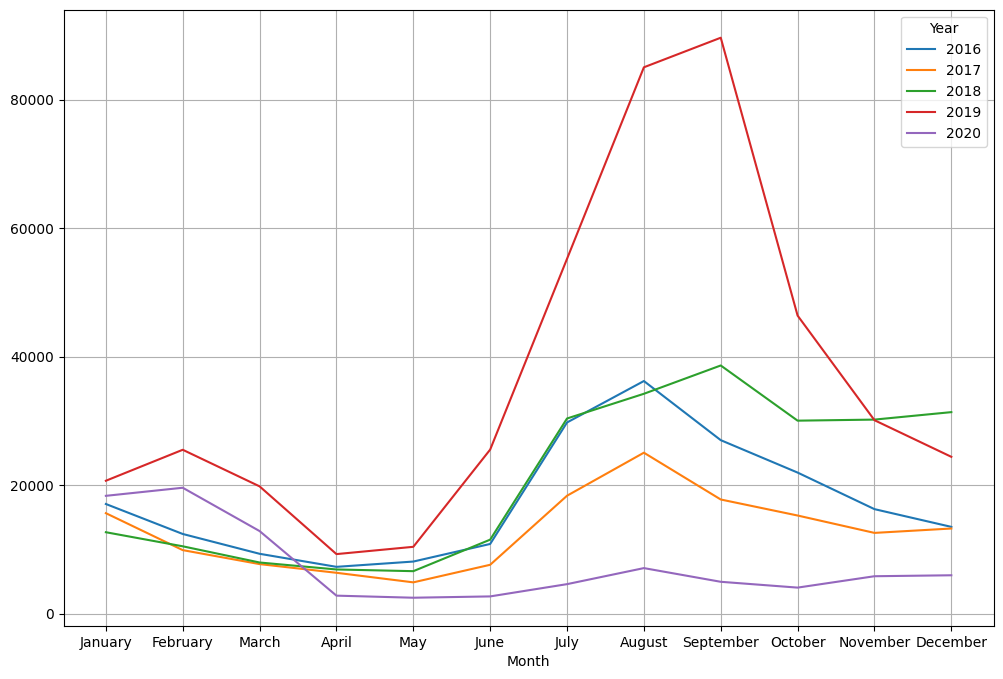

In [22]:

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)

monthly_cases = df.groupby(['Month', 'Year'])["Dengue_Cases"].sum()

monthly_cases.unstack().plot(kind='line')
plt.gcf().set_size_inches(12,8)
plt.grid(True)
plt.xticks(range(0,12), month_order)
plt.show()

In [23]:
df

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [24]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)

df_2019 = df[df['Year'] == 2019]
region_death_2019 = df_2019.groupby('Month')['Dengue_Cases'].sum().reset_index()


C:\Users\RIZEN\AppData\Local\Temp\ipykernel_11212\3994661205.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  region_death_2019 = df_2019.groupby('Month')['Dengue_Cases'].sum().reset_index()


In [25]:
df['Region'].unique()

['Region I', 'Region II', 'Region III', 'Region IV-A', 'Region IV-B', ..., 'Region XII', 'Region XIII', 'NCR', 'CAR', 'BARMM']
Length: 17
Categories (17, object): ['BARMM', 'CAR', 'NCR', 'Region I', ..., 'Region X', 'Region XI', 'Region XII', 'Region XIII']

In [26]:
df_2016 = df[df['Year'] == 2016]
region1 = df[df['Region'] == 'Region I']



In [27]:
region1

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
5,June,2016,Region I,345,1
6,July,2016,Region I,1295,2
7,August,2016,Region I,1598,3
8,September,2016,Region I,1415,3
9,October,2016,Region I,1000,6


In [28]:
df_2016

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
967,August,2016,BARMM,327,2
968,September,2016,BARMM,124,105
969,October,2016,BARMM,82,109
970,November,2016,BARMM,143,1


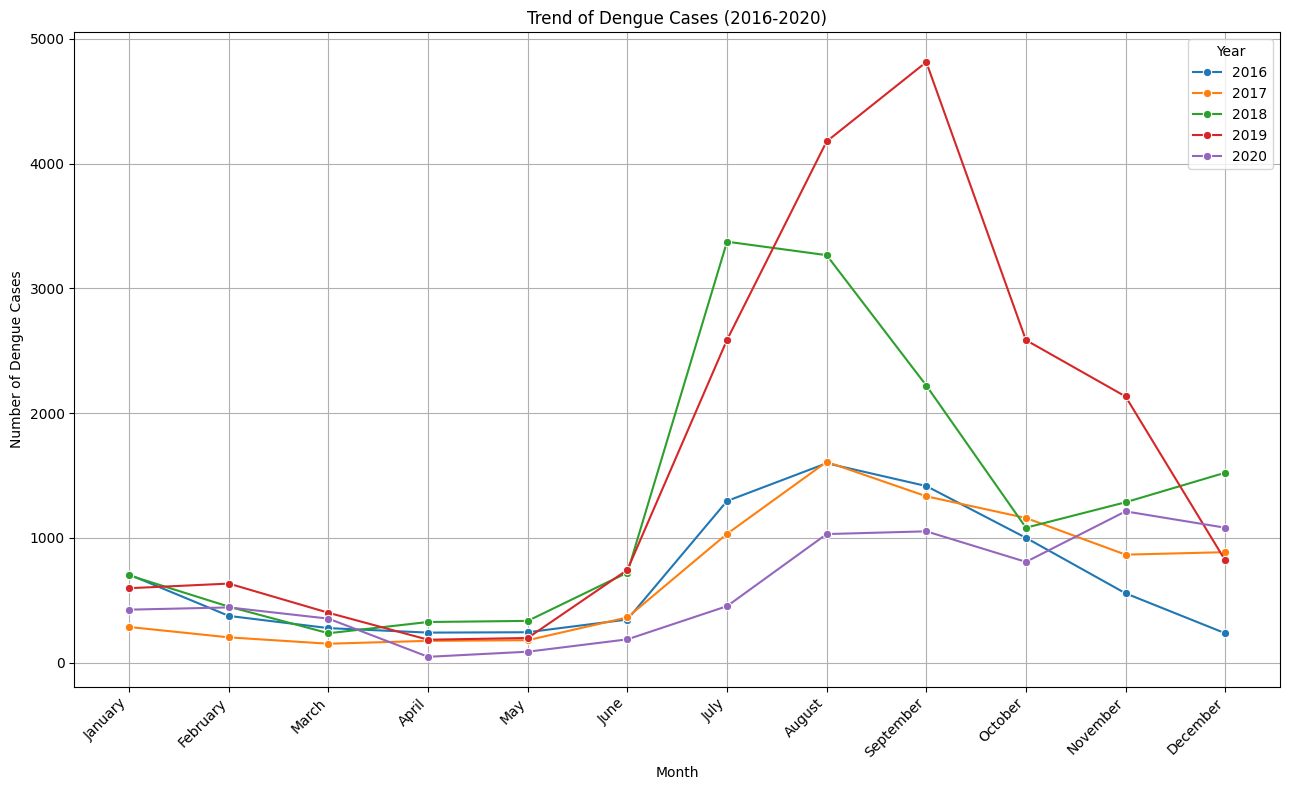

In [29]:

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)

# Create the line plot
sns.lineplot( data=region1, x='Month', y='Dengue_Cases', hue='Year', marker='o')
plt.gcf().set_size_inches(13, 8)
plt.title('Trend of Dengue Cases (2016-2020)')
plt.xlabel('Month')
plt.ylabel('Number of Dengue Cases')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()

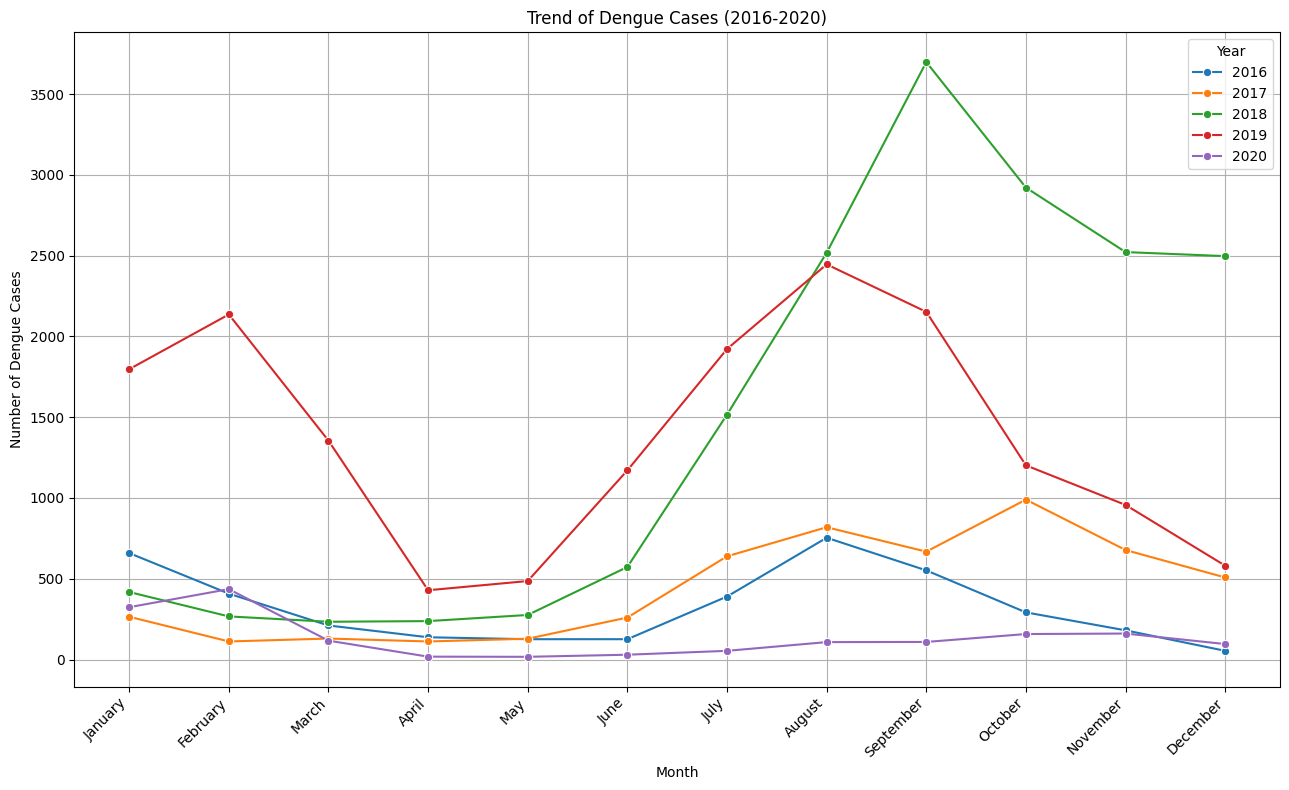

In [30]:
region2 = df[df['Region'] == 'Region II']

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)

# Create the line plot
sns.lineplot( data=region2, x='Month', y='Dengue_Cases', hue='Year', marker='o')
plt.gcf().set_size_inches(13, 8)
plt.title('Trend of Dengue Cases (2016-2020)')
plt.xlabel('Month')
plt.ylabel('Number of Dengue Cases')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()

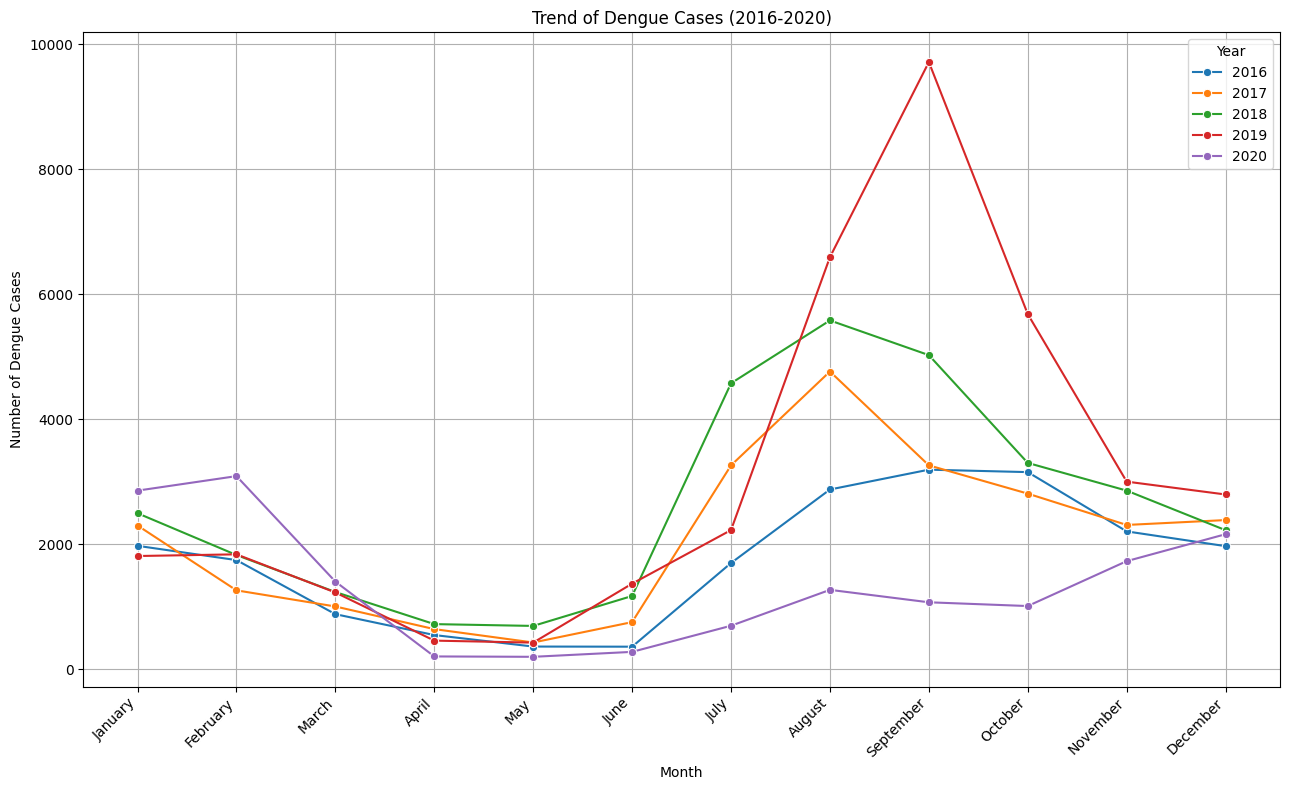

In [31]:
region3 = df[df['Region'] == 'Region III']

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)

# Create the line plot
sns.lineplot( data=region3, x='Month', y='Dengue_Cases', hue='Year', marker='o')
plt.gcf().set_size_inches(13, 8)
plt.title('Trend of Dengue Cases (2016-2020)')
plt.xlabel('Month')
plt.ylabel('Number of Dengue Cases')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()

In [32]:
df['Region'].unique()

['Region I', 'Region II', 'Region III', 'Region IV-A', 'Region IV-B', ..., 'Region XII', 'Region XIII', 'NCR', 'CAR', 'BARMM']
Length: 17
Categories (17, object): ['BARMM', 'CAR', 'NCR', 'Region I', ..., 'Region X', 'Region XI', 'Region XII', 'Region XIII']

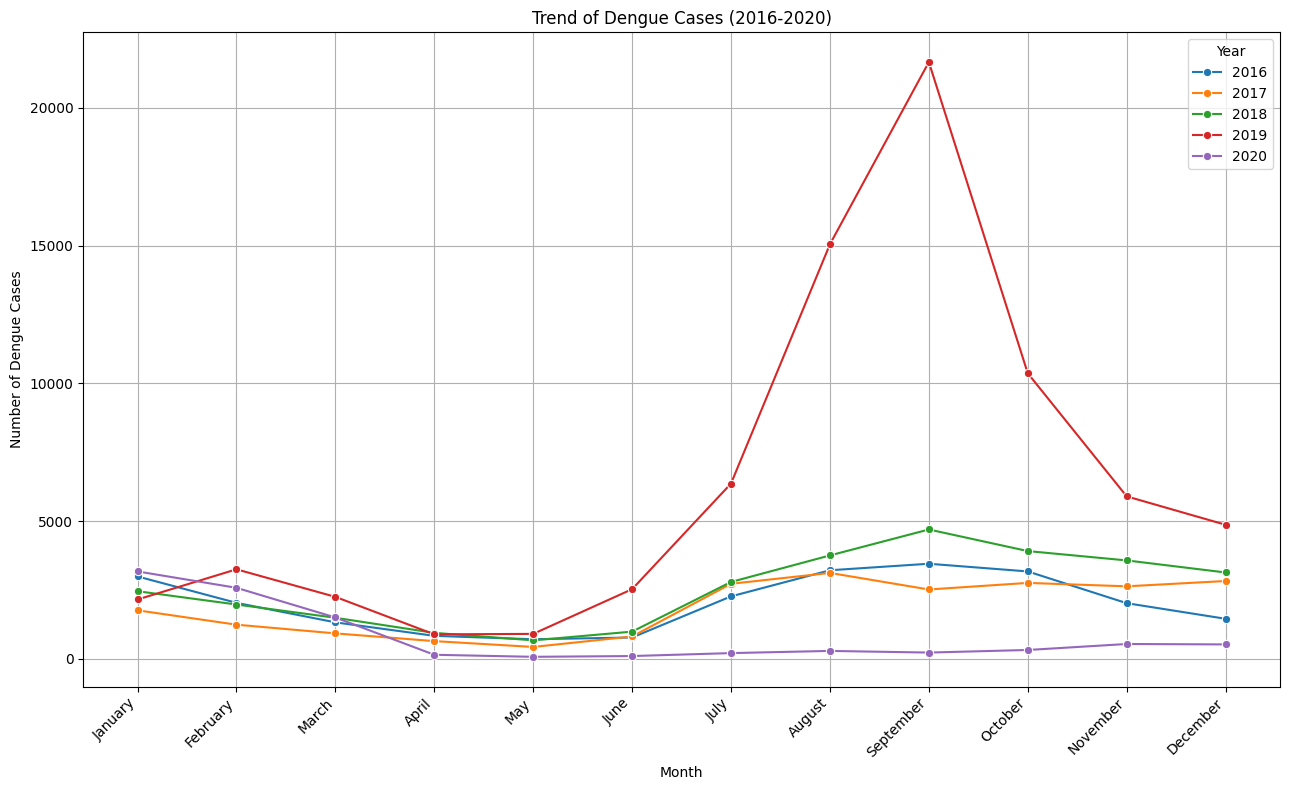

In [33]:
region4a = df[df['Region'] == 'Region IV-A']

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)

# Create the line plot
sns.lineplot( data=region4a, x='Month', y='Dengue_Cases', hue='Year', marker='o')
plt.gcf().set_size_inches(13, 8)
plt.title('Trend of Dengue Cases (2016-2020)')
plt.xlabel('Month')
plt.ylabel('Number of Dengue Cases')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()

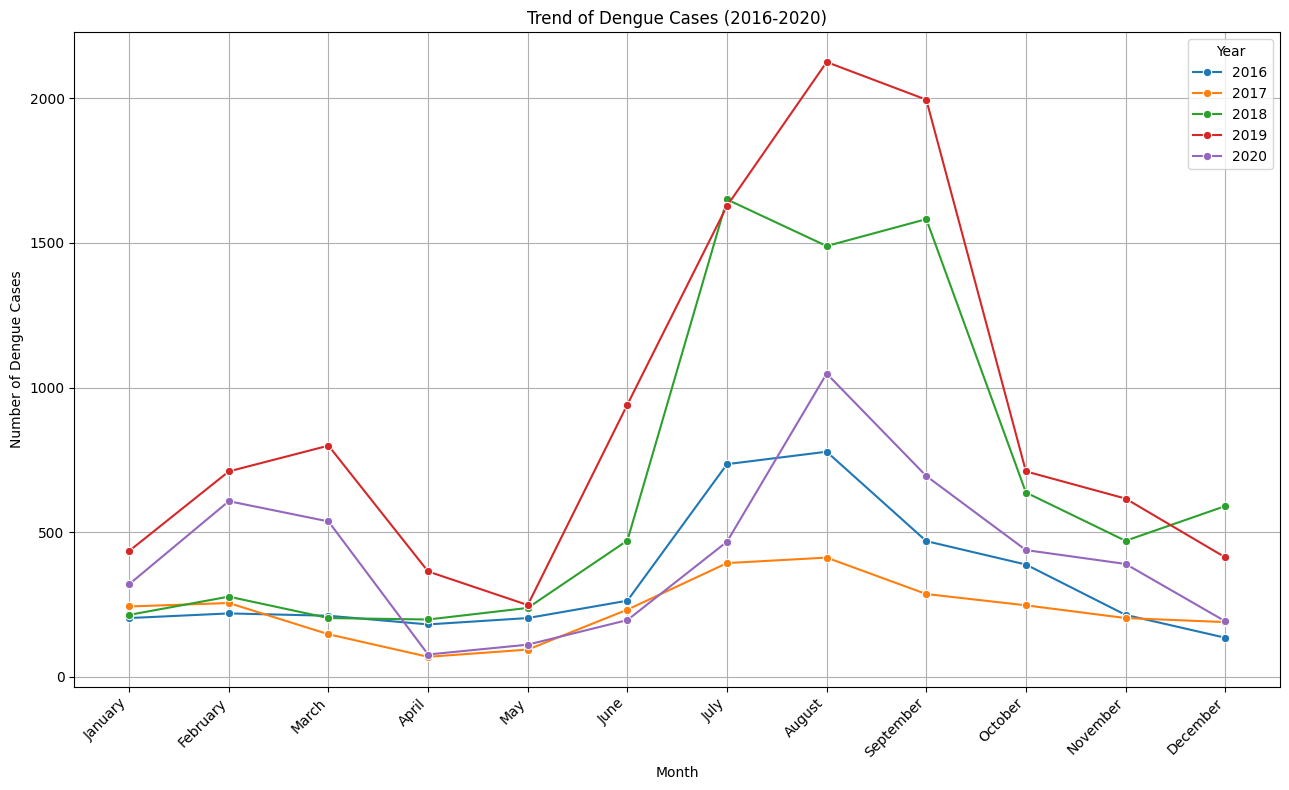

In [34]:
region4b = df[df['Region'] == 'Region IV-B']

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)

# Create the line plot
sns.lineplot( data=region4b, x='Month', y='Dengue_Cases', hue='Year', marker='o')
plt.gcf().set_size_inches(13, 8)
plt.title('Trend of Dengue Cases (2016-2020)')
plt.xlabel('Month')
plt.ylabel('Number of Dengue Cases')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()

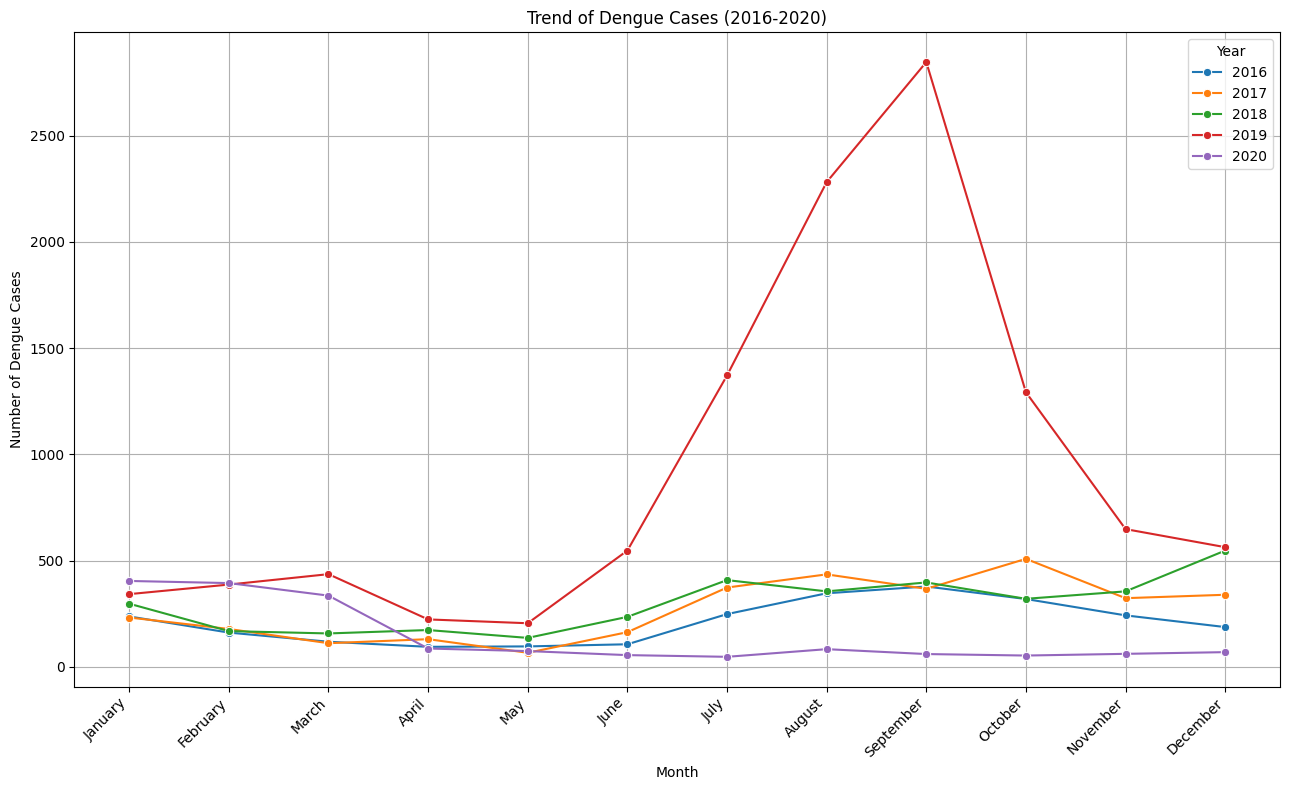

In [35]:
region5 = df[df['Region'] == 'Region V']

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)

# Create the line plot
sns.lineplot( data=region5, x='Month', y='Dengue_Cases', hue='Year', marker='o')
plt.gcf().set_size_inches(13, 8)
plt.title('Trend of Dengue Cases (2016-2020)')
plt.xlabel('Month')
plt.ylabel('Number of Dengue Cases')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\RIZEN\AppData\Local\Temp\ipykernel_11212\2908508982.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2016['Month'] = pd.Categorical(df_2016['Month'], categories=month_order, ordered=True)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


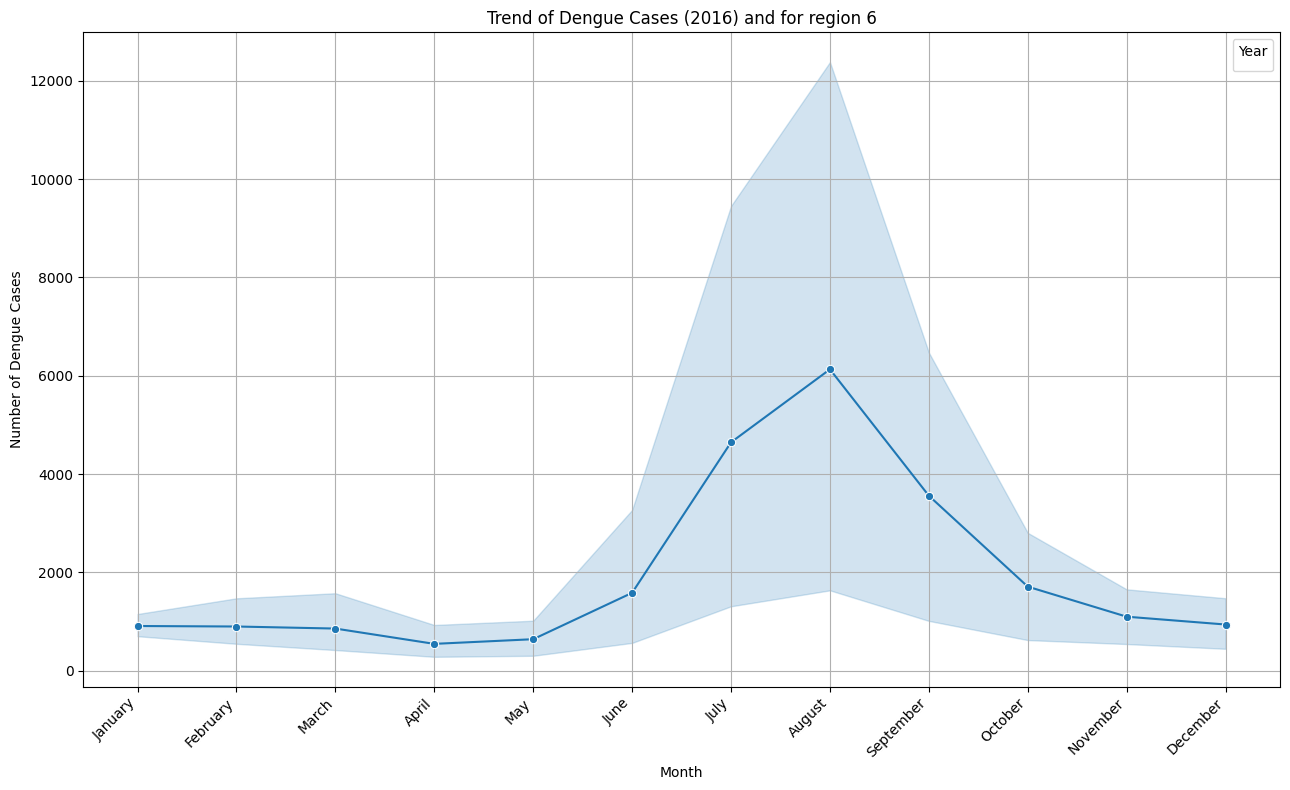

In [36]:
region6 = df[df['Region'] == 'Region VI']
df_2016 = df[df['Year'] == 2016]
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
df_2016['Month'] = pd.Categorical(df_2016['Month'], categories=month_order, ordered=True)

# Create the line plot
sns.lineplot( data=region6, x='Month', y='Dengue_Cases', marker='o')
plt.gcf().set_size_inches(13, 8)
plt.title('Trend of Dengue Cases (2016) and for region 6')
plt.xlabel('Month')
plt.ylabel('Number of Dengue Cases')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()